In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


# EDA 

In [2]:
df = pd.read_csv('anime_details_cleaned+genres.csv')

# Description of Variables, what we are using

genres - Type of genre (Eg, Action, Fantasy, horror) / We also list them out as shown above

media_type - Streaming Type

num_episodes - Number of Episodes

source - Source of Story

rating - Age restricted rating

Dropped - Number of People who did not finish watching the show

Completed - Number of people who completed the show

mean - Average score rated by the viewers


In [3]:
df.describe()

,id,mean,rank,popularity,num_list_users,num_scoring_users,num_episodes,start_season.year,statistics.watching,statistics.completed,statistics.on_hold,statistics.dropped,statistics.plan_to_watch,statistics.num_list_users
count,24092.000000,15308.000000,22146.000000,24092.000000,2.409200e+04,2.409200e+04,24092.000000,19452.000000,2.409200e+04,2.409200e+04,24092.000000,24092.000000,24092.000000,2.409200e+04
mean,28920.195584,6.416480,11073.391764,12046.423087,3.725052e+04,1.897869e+04,14.837456,2008.350401,2.456942e+03,2.373452e+04,976.435663,1224.041632,8859.727337,3.725167e+04
std,17651.945851,0.909057,6393.166593,6954.943904,1.558297e+05,9.337898e+04,48.759773,13.418377,1.586125e+04,1.142457e+05,4992.340805,5568.085162,28999.996683,1.558362e+05
min,1.000000,1.850000,1.000000,1.000000,1.400000e+01,0.000000e+00,0.000000,1917.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,4.000000,1.400000e+01
25%,10043.750000,5.790000,5537.250000,6023.750000,2.220000e+02,4.800000e+01,1.000000,2003.000000,1.100000e+01,7.000000e+01,3.000000,24.000000,53.000000,2.220000e+02
50%,33847.500000,6.420000,11073.500000,12046.500000,1.128500e+03,3.110000e+02,2.000000,2012.000000,4.700000e+01,4.180000e+02,23.000000,74.000000,405.500000,1.129000e+03
75%,44354.250000,7.080000,16609.750000,18069.250000,9.649250e+03,3.488000e+03,13.000000,2018.000000,4.460000e+02,4.591000e+03,237.000000,240.000000,3239.000000,9.648500e+03
max,54730.000000,9.170000,22146.000000,24092.000000,3.672369e+06,2.611059e+06,3057.000000,2025.000000,1.467151e+06,3.213722e+06,260194.000000,205503.000000,600304.000000,3.672501e+06


In [4]:
print(f"The number of animes: {len(df)}")

The number of animes: 24092


# The number of different genres

In [348]:
col_list = df.columns.values.tolist()
new_col=col_list[21:]
print(new_col)

['Parody', 'Hentai', 'Action', 'Comedy', 'Organized Crime', 'Horror', 'Historical', 'Combat Sports', 'Video Game', 'Otaku Culture', 'Gag Humor', 'Vampire', 'Reverse Harem', 'Girls Love', 'Kids', 'Shoujo', 'Gourmet', 'Showbiz', 'Military', 'Space', 'Music', 'Detective', 'Mythology', 'Romance', 'Martial Arts', 'Romantic Subtext', 'Harem', 'Iyashikei', 'Time Travel', 'Ecchi', 'Suspense', 'Idols (Male)', 'Pets', 'Workplace', 'Anthropomorphic', 'Medical', 'Gore', 'Supernatural', 'Survival', 'Team Sports', 'Crossdressing', 'Drama', 'Isekai', 'Racing', 'Erotica', 'Childcare', 'Mystery', 'Boys Love', 'Visual Arts', 'Mecha', 'Strategy Game', 'Adult Cast', 'Idols (Female)', 'Fantasy', 'Super Power', 'Mahou Shoujo', 'Sci-Fi', 'Psychological', 'Delinquents', 'Samurai', 'School', 'CGDCT', 'Slice of Life', 'Reincarnation', 'Educational', 'Avant Garde', 'Shounen', 'Seinen', 'Adventure', 'Josei', 'Award Winning', 'Performing Arts', 'Love Polygon', 'Magical Sex Shift', 'High Stakes Game', 'Sports']


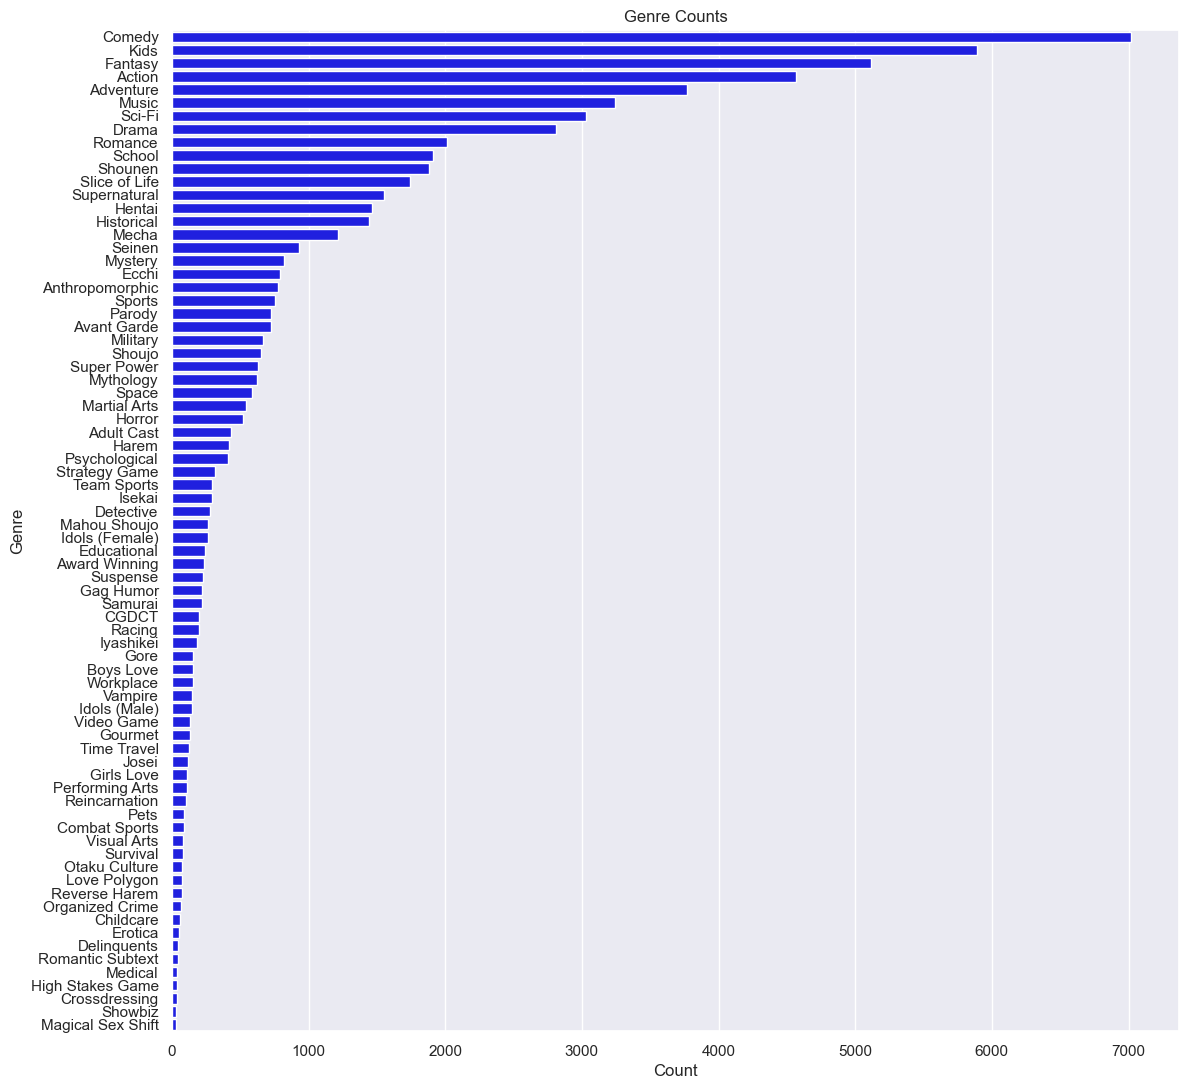

In [349]:
sliced_df = df[new_col]
number_df=sliced_df.sum()
number_df = pd.DataFrame(data = number_df)
number_df.columns = ["Count"]
df2 = number_df.assign(Genre=new_col)
df2 = df2.sort_values(['Count'], ascending=False).reset_index(drop=True)

plt.figure(figsize=(13, 13))

# Make a barplot
sb.barplot(
    x="Count", 
    y="Genre", 
    data=df2, 
    estimator=sum, 
    ci=None, 
    color='Blue'
).set(title="Genre Counts");

## Conclusion:

* **Comedy** genre has the highest number of animes produced. Followed by **Kids, Fantasy, Action and Adventure.**

* **Magical Sex Shift** has the lowest number of animes produced. Followed by **Showbiz, Crossdressing, High Stakes Game and Medical.**

## Analysis:

* Most of the animes produced are skewd towards content that are funny, action packed, cuteness (kid-friendly anime) and other-worldly content.

---

# Genre trend from 1999 to 2022

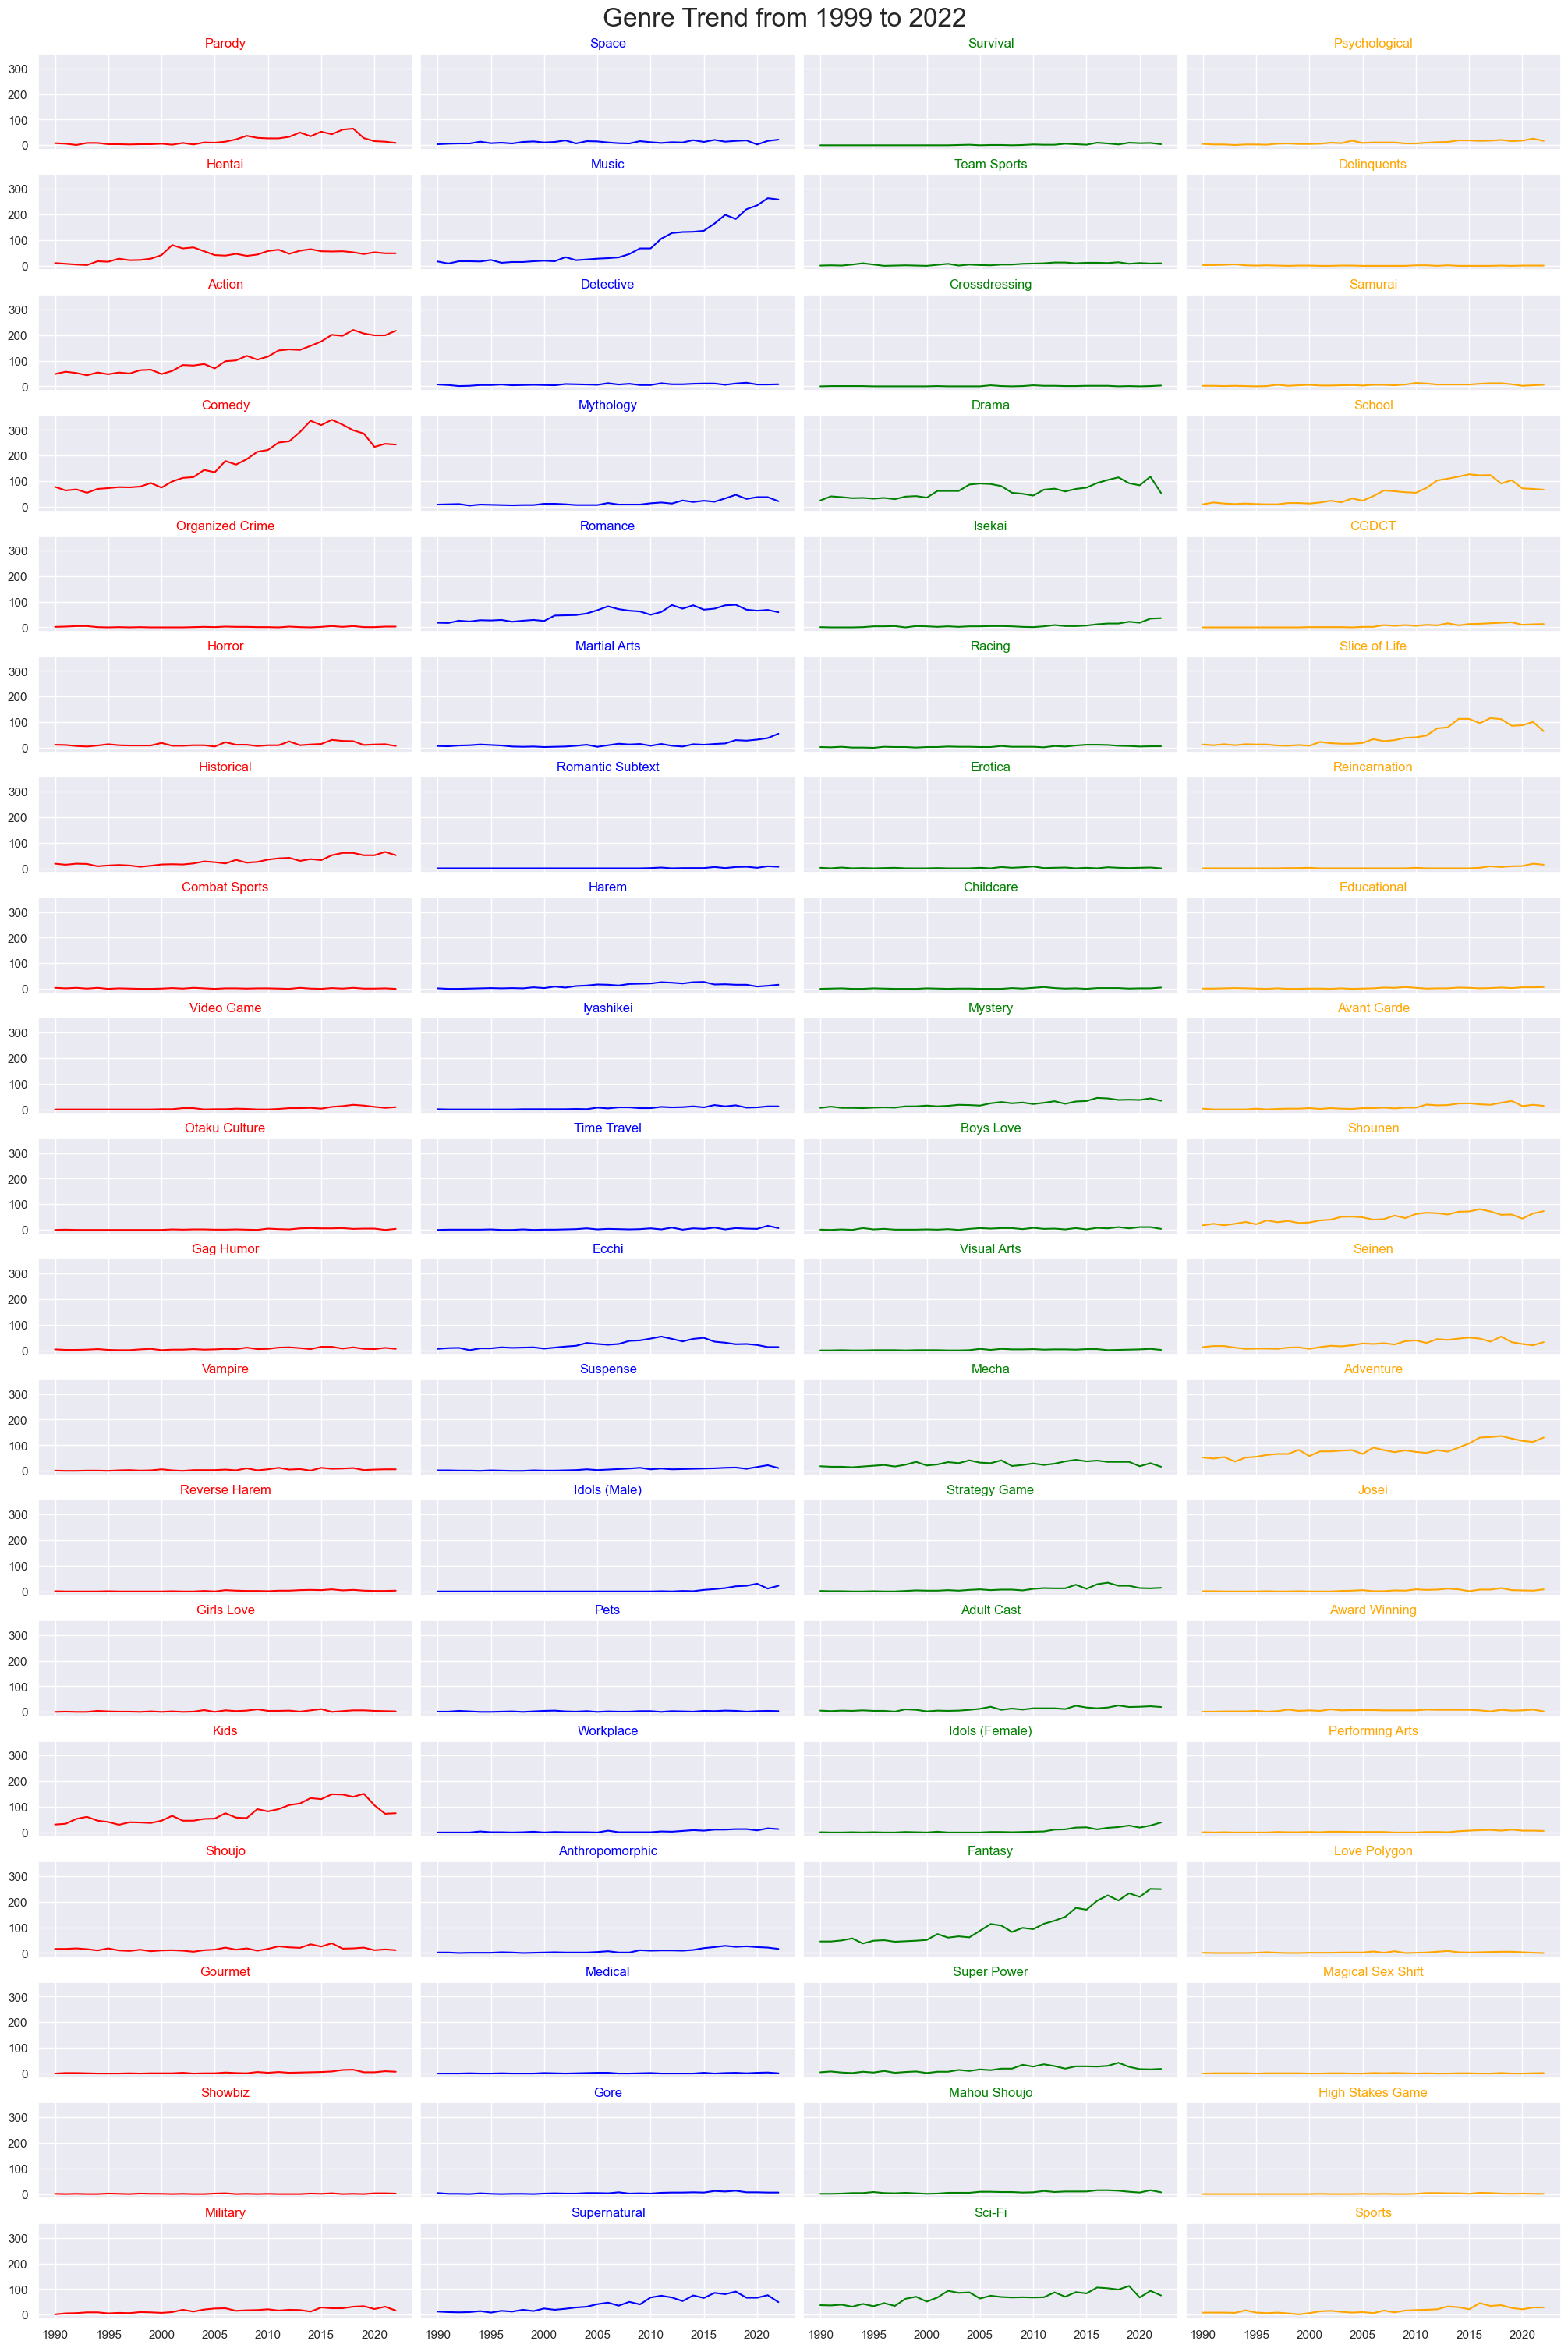

In [8]:
df_genre = pd.read_csv('anime_details_cleaned+genres.csv')
df_genre.drop(['num_list_users','num_scoring_users','statistics.plan_to_watch','media_type','status','num_episodes','source','rating','statistics.num_list_users','statistics.dropped','statistics.on_hold','statistics.completed','statistics.watching','studios','rating','source','num_episodes'], axis=1, inplace=True)
genres_time_series_df = df_genre.loc[:, ['start_season.year','Parody', 'Hentai', 'Action', 'Comedy', 'Organized Crime', 'Horror', 'Historical', 'Combat Sports', 'Video Game', 'Otaku Culture', 'Gag Humor', 'Vampire', 'Reverse Harem', 'Girls Love', 'Kids', 'Shoujo', 'Gourmet', 'Showbiz', 'Military', 'Space', 'Music', 'Detective', 'Mythology', 'Romance', 'Martial Arts', 'Romantic Subtext', 'Harem', 'Iyashikei', 'Time Travel', 'Ecchi', 'Suspense', 'Idols (Male)', 'Pets', 'Workplace', 'Anthropomorphic', 'Medical', 'Gore', 'Supernatural', 'Survival', 'Team Sports', 'Crossdressing', 'Drama', 'Isekai', 'Racing', 'Erotica', 'Childcare', 'Mystery', 'Boys Love', 'Visual Arts', 'Mecha', 'Strategy Game', 'Adult Cast', 'Idols (Female)', 'Fantasy', 'Super Power', 'Mahou Shoujo', 'Sci-Fi', 'Psychological', 'Delinquents', 'Samurai', 'School', 'CGDCT', 'Slice of Life', 'Reincarnation', 'Educational', 'Avant Garde', 'Shounen', 'Seinen', 'Adventure', 'Josei', 'Award Winning', 'Performing Arts', 'Love Polygon', 'Magical Sex Shift', 'High Stakes Game', 'Sports']]

for row in range(len(genres_time_series_df)):
    start_season_year = genres_time_series_df['start_season.year'][row]
    
 
genres_time_series_df= genres_time_series_df.dropna()

df_sorted_season=genres_time_series_df.sort_values('start_season.year')

df_season_woNAN = df_sorted_season.dropna()

# all these is to clean the season year and remove the nan values 
df_sum_by_year = df_season_woNAN.groupby(['start_season.year']).sum()

df_sum_by_year= df_sum_by_year.reset_index()

df_sum_by_1990 = df_sum_by_year.iloc[65:-3]

# use seaborn style
sb.set_theme()
colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, axs = plt.subplots(19, 4, figsize=(20, 30), sharey=True, sharex=True, constrained_layout=True)
fig.suptitle('Genre Trend from 1999 to 2022', fontsize=24)

x_index = 0
y_index = 0

genres_list = list(df_sum_by_1990.columns)[1:]

for genre in genres_list:
    # plot line graph
    axs[x_index, y_index].plot('start_season.year', genre, data=df_sum_by_1990, color=colors[y_index])
    axs[x_index, y_index].set_title(f'{genre}', color=colors[y_index])
    
    # subplot ordering
    x_index += 1
    if x_index > 18:
        x_index -= 19
        y_index += 1
        

# show the graph
plt.show()

# Conclusion

* From this, we can see that the number of anime with genres like Fantasy, Action , Avendture and kids have increased over the year based on this time graph. This corresponds to the number of animes produced as well.

# Analysis on studio.

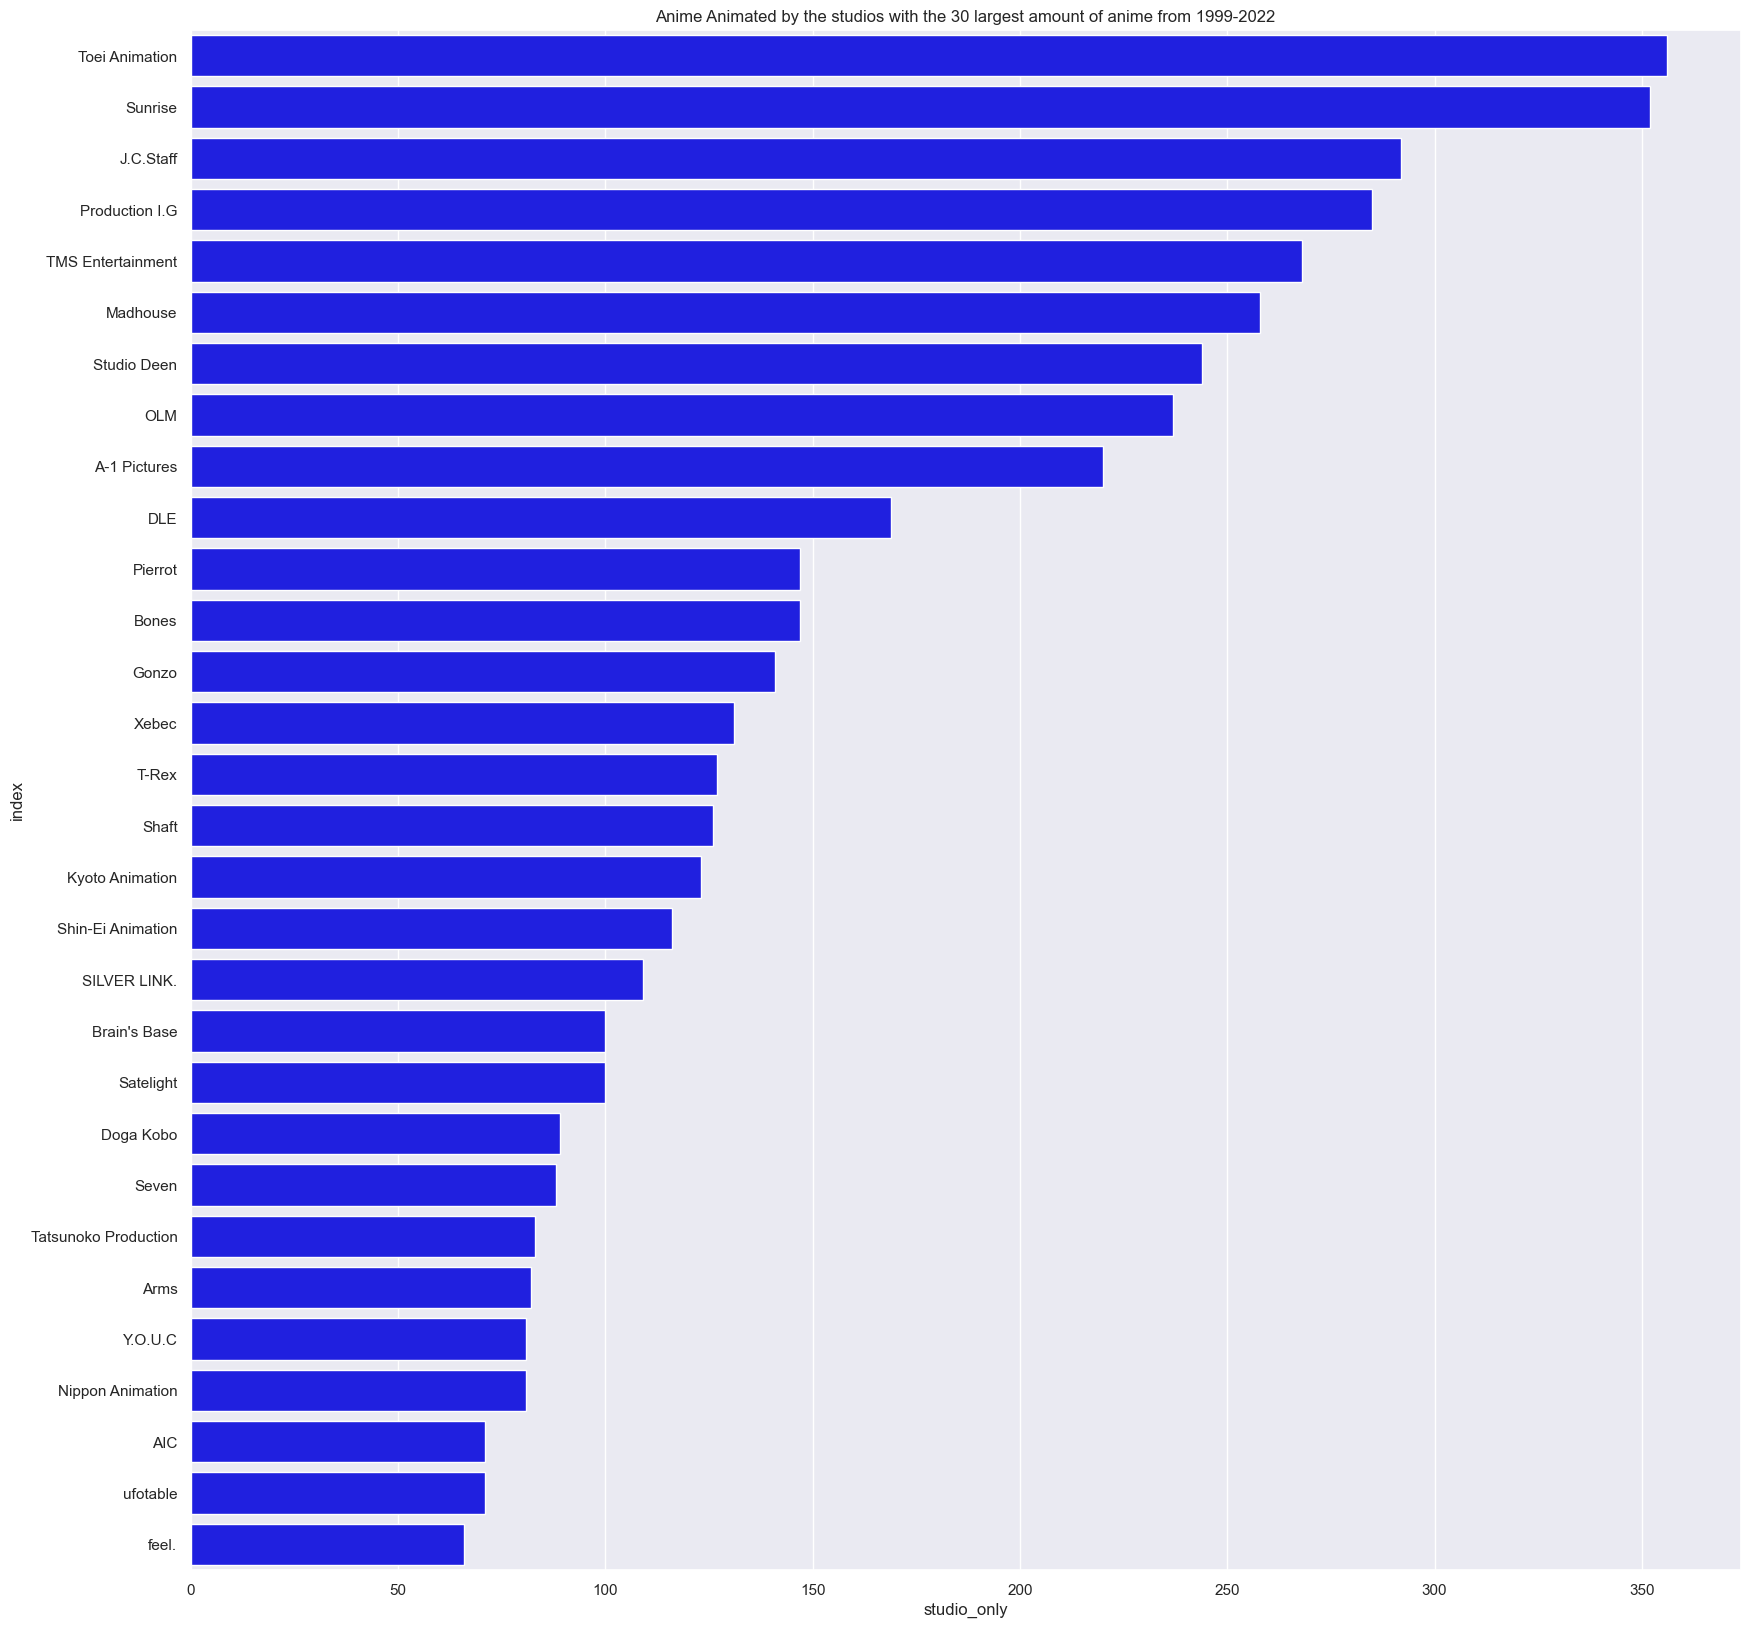

In [28]:
import ast 
df_studios = pd.read_csv('anime_details_cleaned.csv')
# want to years from 1999 to 2023
lst = [x for x in range(1999, 2023)]
df_studios=df_studios[df_studios['start_season.year'].isin(lst)]
df_studios= df_studios.sort_values(('start_season.year'),ascending=False)
df_dropped_studios=df_studios.drop(['start_season.year','start_season.season','statistics.watching','statistics.num_list_users','statistics.plan_to_watch','statistics.dropped','statistics.on_hold','statistics.completed','source','status'],axis=1)
df_dropped_studios['studio_name'] = df_dropped_studios['studios'].astype('str')

df_dropped_studios['studio_name'] = df_dropped_studios['studios'].apply(lambda x: ast.literal_eval(str(x)))

def studio_name(row):
    print(row['studio_name'][0]['name'])
    name = row['studio_name'][0]['name']
    return name

df_dropped_studios['studio_only'] = df_dropped_studios['studio_name'].apply(lambda x:
                                                x[0].get('name', '')
                                                if len(x) > 0 else 'no studio')

#df_studio_num = df_dropped_studios.groupby(['studio_only']).count()
df_studio_num = df_dropped_studios['studio_only'].value_counts()

df_studio_num = pd.DataFrame(data=df_studio_num )

df_studio_num =df_studio_num.drop(['no studio'],axis=0)

df_studio_num= df_studio_num.nlargest(30, columns=['studio_only'], keep='first')

df_studio_num= df_studio_num.reset_index()

plt.figure(figsize=(20, 20))

# Make a barplot
sb.barplot(
    x='studio_only', 
    y="index",
    data=df_studio_num, 
    estimator=sum, 
    ci=None, 
    color='Blue'
).set(title="Anime Animated by the studios with the 30 largest amount of anime from 1999-2022");

In [287]:
# A list for the top 30 studio
top_30list = []
for studio in df_studio_num['index']:
    top_30list.append(studio)

# Conclusion

* Toei Animation has made the most of anime from 1999 to 2022, followed by Sunrise

# Proportion of top rated 100 animes produced by studios

In [236]:
df_studios_proportion = df_dropped_studios[df_dropped_studios['studio_only'] != 'no studio'] # filter 

prop_dict = {}
for studio in df_top_100['studio_only']:
    prop_dict[studio]=0
    
    
for studio in df_top_100['studio_only']:
    prop_dict[studio]+=1

prop_dict = dict(sorted(prop_dict.items(), key=lambda x:x[1],reverse = True))

for k,v in prop_dict.items():
    print(f"{k}: {v/100}")


lst_top_100anime = []

for k,v in prop_dict.items():
    lst_top_100anime.append(k)

Madhouse: 0.09
Sunrise: 0.06
Bandai Namco Pictures: 0.05
A-1 Pictures: 0.05
Wit Studio: 0.05
Kyoto Animation: 0.05
Shaft: 0.05
Artland: 0.05
Pierrot: 0.04
ufotable: 0.04
MAPPA: 0.04
Bones: 0.03
Production I.G: 0.03
Studio Deen: 0.03
Kinema Citrus: 0.03
Brain's Base: 0.03
White Fox: 0.02
TMS Entertainment: 0.02
CloverWorks: 0.02
CoMix Wave Films: 0.02
Studio Ghibli: 0.02
David Production: 0.02
Gainax: 0.02
Shuka: 0.02
Studio LAN: 0.01
Studio Bind: 0.01
OLM: 0.01
Toei Animation: 0.01
Tatsunoko Production: 0.01
B.CMAY PICTURES: 0.01
Trigger: 0.01
Khara: 0.01
Studio Chizu: 0.01
Shin-Ei Animation: 0.01
Studio VOLN: 0.01
J.C.Staff: 0.01


# Analysis

* For the first top 100 highly rated animes. MadHouse has the highest proportion of anime produced.

* Some of the few highly rated shows from the top 100 animes are Death Note, One Punch Man, HunterXHunter and many more

# Analysis on the number of completed and dropped with mean 1999 - 2022 

### - The top 100 highly rated anime produced by a studio 
### - The top 30 number of anime produced by a studio

In [351]:
df_complete_or_drop = pd.read_csv('anime_details_cleaned.csv')
df_complete_or_drop=df_complete_or_drop[df_complete_or_drop['start_season.year'].isin(lst)]
df_complete_or_drop = df_complete_or_drop[['studios','title','mean','statistics.watching','statistics.completed','statistics.on_hold','statistics.dropped','statistics.plan_to_watch']]

df_complete_or_drop['studio_name'] = df_complete_or_drop['studios'].astype('str')

df_complete_or_drop['studio_name'] = df_complete_or_drop['studios'].apply(lambda x: ast.literal_eval(str(x)))

def studio_name(row):
    print(row['studio_name'][0]['name'])
    name = row['studio_name'][0]['name']
    return name

df_complete_or_drop['studio_only'] = df_complete_or_drop['studio_name'].apply(lambda x:
                                                x[0].get('name', '')
                                                if len(x) > 0 else 'no studio')


df_complete_or_drop=df_complete_or_drop.drop(['studios','studio_name'],axis=1)

df_complete_or_drop = df_complete_or_drop.dropna()
df_complete_or_drop_no_studios = df_complete_or_drop[df_complete_or_drop['studio_only'] != 'no studio'] # filter 
df_groupby = df_complete_or_drop_no_studios.groupby('studio_only').sum()
df_groupby = df_groupby.reset_index()



df_groupby_mean_rating = df_complete_or_drop_no_studios.groupby('studio_only').mean()

df_groupby_mean_rating_30 = df_complete_or_drop_no_studios.groupby('studio_only').mean()
# For merging top 100
df_groupby_mean_rating_col_100 = df_groupby_mean_rating[['mean']]
df_groupby_mean_rating_col_100=df_groupby_mean_rating_col_100.reset_index()
df_groupby_mean_rating_col_100 =df_groupby_mean_rating_col_100[df_groupby_mean_rating_col_100['studio_only'].isin(lst_top_100studio)]

# For merging 30
df_groupby_mean_rating_col_30 = df_groupby_mean_rating_30[['mean']]
df_groupby_mean_rating_col_30=df_groupby_mean_rating_col_30.reset_index()
df_groupby_mean_rating_col_30 =df_groupby_mean_rating_col_30[df_groupby_mean_rating_col_30['studio_only'].isin(top_30list)]

## Studios produced the top 100 anime

In [344]:
df_groupby_top = df_groupby[df_groupby['studio_only'].isin(lst_top_100studio)]


top_dict = {}

for i in range(len(df_groupby_top)):
    completed = df_groupby_top.iloc[i]['statistics.completed']
    studi = df_groupby_top.iloc[i]['studio_only']
    dropped = df_groupby_top.iloc[i]['statistics.dropped']
    top_dict[studi] = dropped/completed
    

top_dict = dict(sorted(top_dict.items(), key=lambda x:x[1],reverse = True))

for k,v in top_dict.items():
    print(f"{k}: {v*100} %")





Tatsunoko Production: 7.58815809656912 %
Artland: 7.579089773310729 %
Shin-Ei Animation: 7.4234992545757255 %
Pierrot: 7.178811498342731 %
Toei Animation: 6.728372987468825 %
B.CMAY PICTURES: 6.329365121702966 %
Trigger: 5.7034702247128735 %
Studio Deen: 5.703386921505355 %
Studio LAN: 5.5896625122340176 %
CloverWorks: 5.3977373208795525 %
Brain's Base: 5.258383315272281 %
Gainax: 5.20868368802222 %
Sunrise: 5.067761065727142 %
TMS Entertainment: 5.035319333691804 %
MAPPA: 4.749045919345715 %
J.C.Staff: 4.706824692074378 %
Kinema Citrus: 4.656464965857804 %
OLM: 4.506085753385757 %
Bandai Namco Pictures: 4.255624208367356 %
David Production: 4.190703005723283 %
Madhouse: 4.158774869279458 %
A-1 Pictures: 4.108726613569209 %
Shaft: 3.8756888400288605 %
Production I.G: 3.4656597666748454 %
White Fox: 3.4225998477404125 %
Kyoto Animation: 3.329945697913508 %
Shuka: 3.20160726029989 %
Studio VOLN: 3.027369519863422 %
Bones: 2.97372464069121 %
Wit Studio: 2.0094131815292537 %
ufotable: 1.70

<AxesSubplot:xlabel='dropout_rate', ylabel='mean_y'>

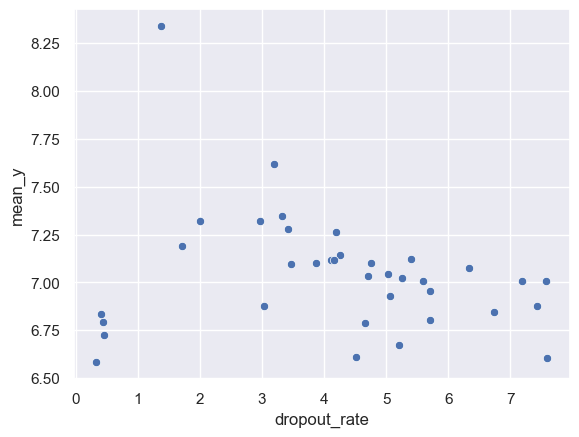

In [347]:
inner_merged_total = pd.merge(df_groupby_top, df_groupby_mean_rating_col_100, on=["studio_only"])
inner_merged_total['dropout_rate'] = (inner_merged_total['statistics.dropped']/inner_merged_total['statistics.completed'])*100
sb.scatterplot(data=inner_merged_total, x="dropout_rate", y="mean_y")

## Analysis

* The studio who has produced some the 100 highly rated - Tatsunoko Production has one of the highest dropped rates with 7.59%
* Some of the animes they have produced are Neo Genesis Evangelion and Psycho-Pass 2

* The studio with the least dropped rate is Studio Ghibli with 0.32%

* From the scatter plot, it seems there is an inverse relationship with mean ratings and drop out rate

* Higher the drop out rate the lower the mean rating

## Top 30 studios with most anime produced

In [308]:
df_groupby_30 = df_groupby[df_groupby['studio_only'].isin(top_30list)]
df_groupby_30=df_groupby_30.reset_index()
top_30_dict = {}

for i in range(len(df_groupby_30)):
    completed = df_groupby_30.iloc[i]['statistics.completed']
    studi = df_groupby_30.iloc[i]['studio_only']
    dropped = df_groupby_30.iloc[i]['statistics.dropped']
    top_30_dict[studi] = dropped/completed
    
    

top_30_dict = dict(sorted(top_30_dict.items(), key=lambda x:x[1],reverse = True))

for k,v in top_30_dict.items():
    print(f"{k}: {v*100} %")


DLE: 14.340884420904493 %
Satelight: 10.732782066267779 %
Y.O.U.C: 8.463353944403506 %
Gonzo: 7.988615345804501 %
Doga Kobo: 7.838641828626594 %
Seven: 7.726728131266858 %
Tatsunoko Production: 7.58815809656912 %
Shin-Ei Animation: 7.4234992545757255 %
Pierrot: 7.178811498342731 %
Xebec: 6.769802355969569 %
Toei Animation: 6.728372987468825 %
T-Rex: 6.46179235774645 %
SILVER LINK.: 6.372416668284693 %
Arms: 6.196607684009801 %
feel.: 5.956258983323299 %
AIC: 5.740914081126031 %
Studio Deen: 5.703386921505355 %
Nippon Animation: 5.595756208435368 %
Brain's Base: 5.258383315272281 %
Sunrise: 5.067761065727142 %
TMS Entertainment: 5.035319333691804 %
J.C.Staff: 4.706824692074378 %
OLM: 4.506085753385757 %
Madhouse: 4.158774869279458 %
A-1 Pictures: 4.108726613569209 %
Shaft: 3.8756888400288605 %
Production I.G: 3.4656597666748454 %
Kyoto Animation: 3.329945697913508 %
Bones: 2.97372464069121 %
ufotable: 1.7061338067368517 %


<AxesSubplot:xlabel='dropout_rate', ylabel='mean_y'>

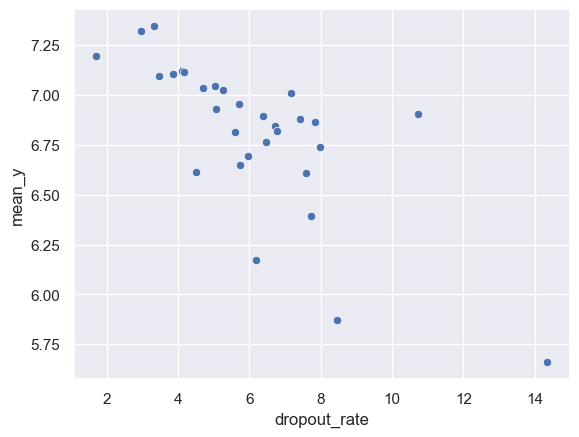

In [355]:
inner_merged_total_30 = pd.merge(df_groupby_30, df_groupby_mean_rating_col_30, on=["studio_only"])
inner_merged_total_30['dropout_rate'] = (inner_merged_total_30['statistics.dropped']/inner_merged_total_30['statistics.completed'])*100
sb.scatterplot(data=inner_merged_total_30, x="dropout_rate", y="mean_y")


## Analysis

* DLE has a very high dropped rate of 14.34%. 

* ufotable has the least dropped rate of 1.70%

* From the scatter plot the seems to be negative correlation with the mean_rating and dropout rate

* Higher the dropout rate lower the mean ratings

# Difference between top 30 (Quantity) and top 100 (Quality)

* For studios relating to quantity, the drop rate is higher compared to studios relating to quality

* For studios relating to quantity, there seem to be a stronger negative correlation with the drop our rate and the mean rating compared to the studios relating to quality, where it has weaker negative correlation????

# Studio compared with mean ratings using box plot

<AxesSubplot:xlabel='mean', ylabel='studio_only'>

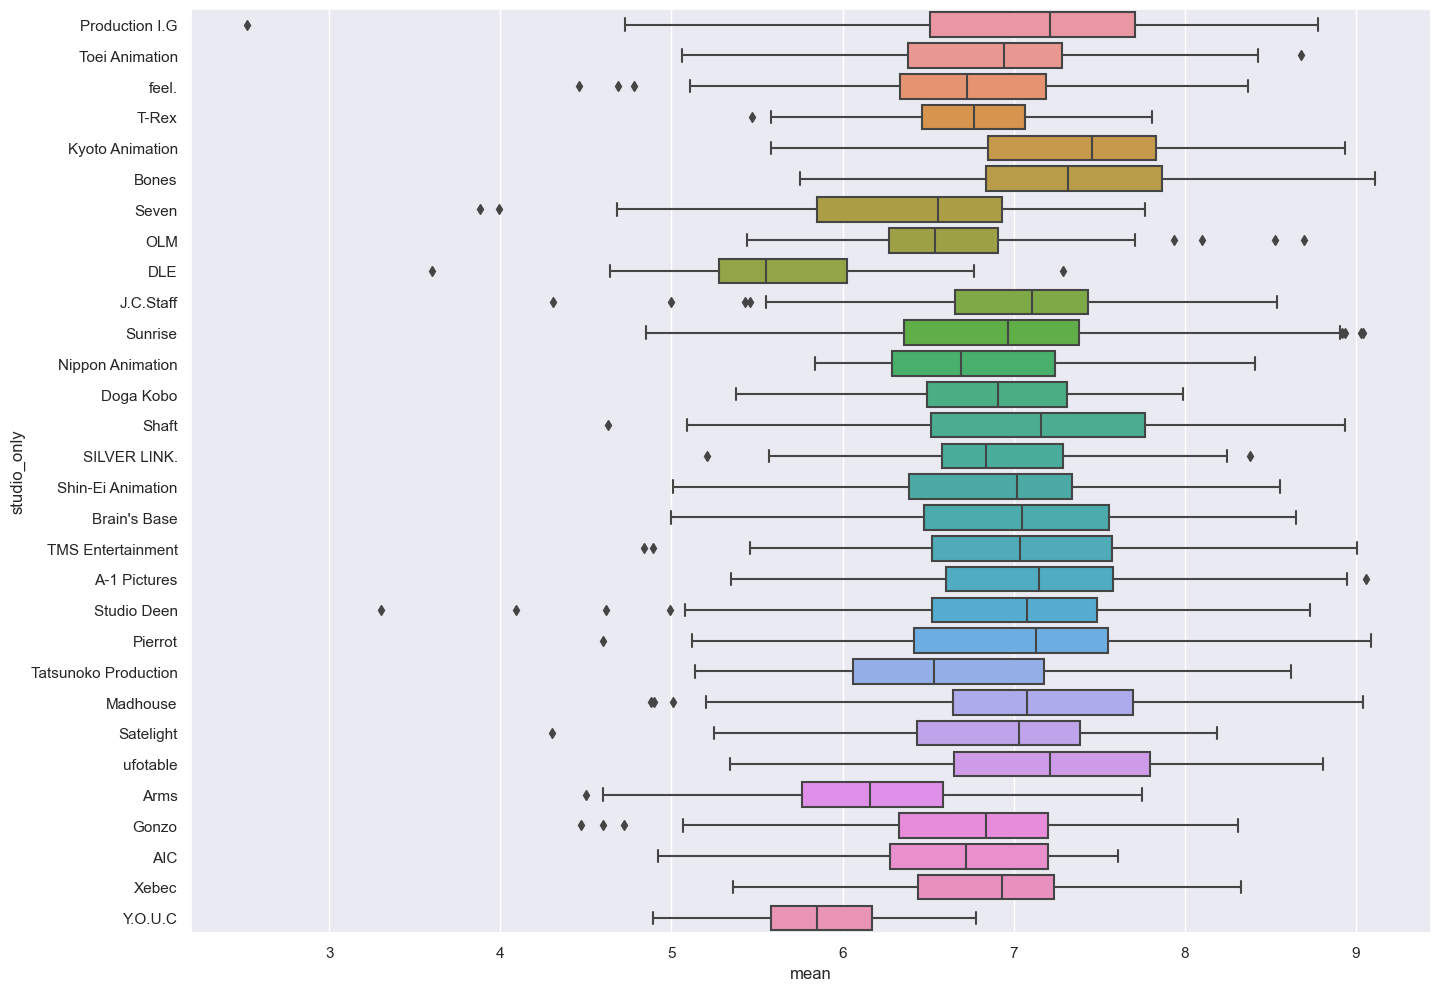

In [12]:
df_dropped_studios_mean = df_dropped_studios.groupby('studio_only').mean()
df_dropped_studios_mean= df_dropped_studios.dropna(subset=['mean'])
df_mean = df_dropped_studios_mean[['mean']]
df_mean = df_mean.reset_index()
df_rating_studio = df_dropped_studios_mean[['mean','studio_only']]

# remomving the studio
df_rating_studio=df_rating_studio[df_rating_studio['studio_only'] != 'no studio']
lst_s = df_studio_num['index'].tolist()

# take the top 20 studio for the most produced, and i will plot the box plot
df_rating_top_30 = df_rating_studio[df_rating_studio['studio_only'].isin(lst_s)]
f = plt.figure(figsize=(16, 12 ))
sb.boxplot(x = 'mean', y = 'studio_only',data = df_rating_top_30)

# Analysis studio with the top 30 studios with most anime produced with mean

* Kyoto Animation has the highest average ratings amongst the other studios which they have produced some highly rated anime such as
Violet Evergarden.


# EDA about Source type

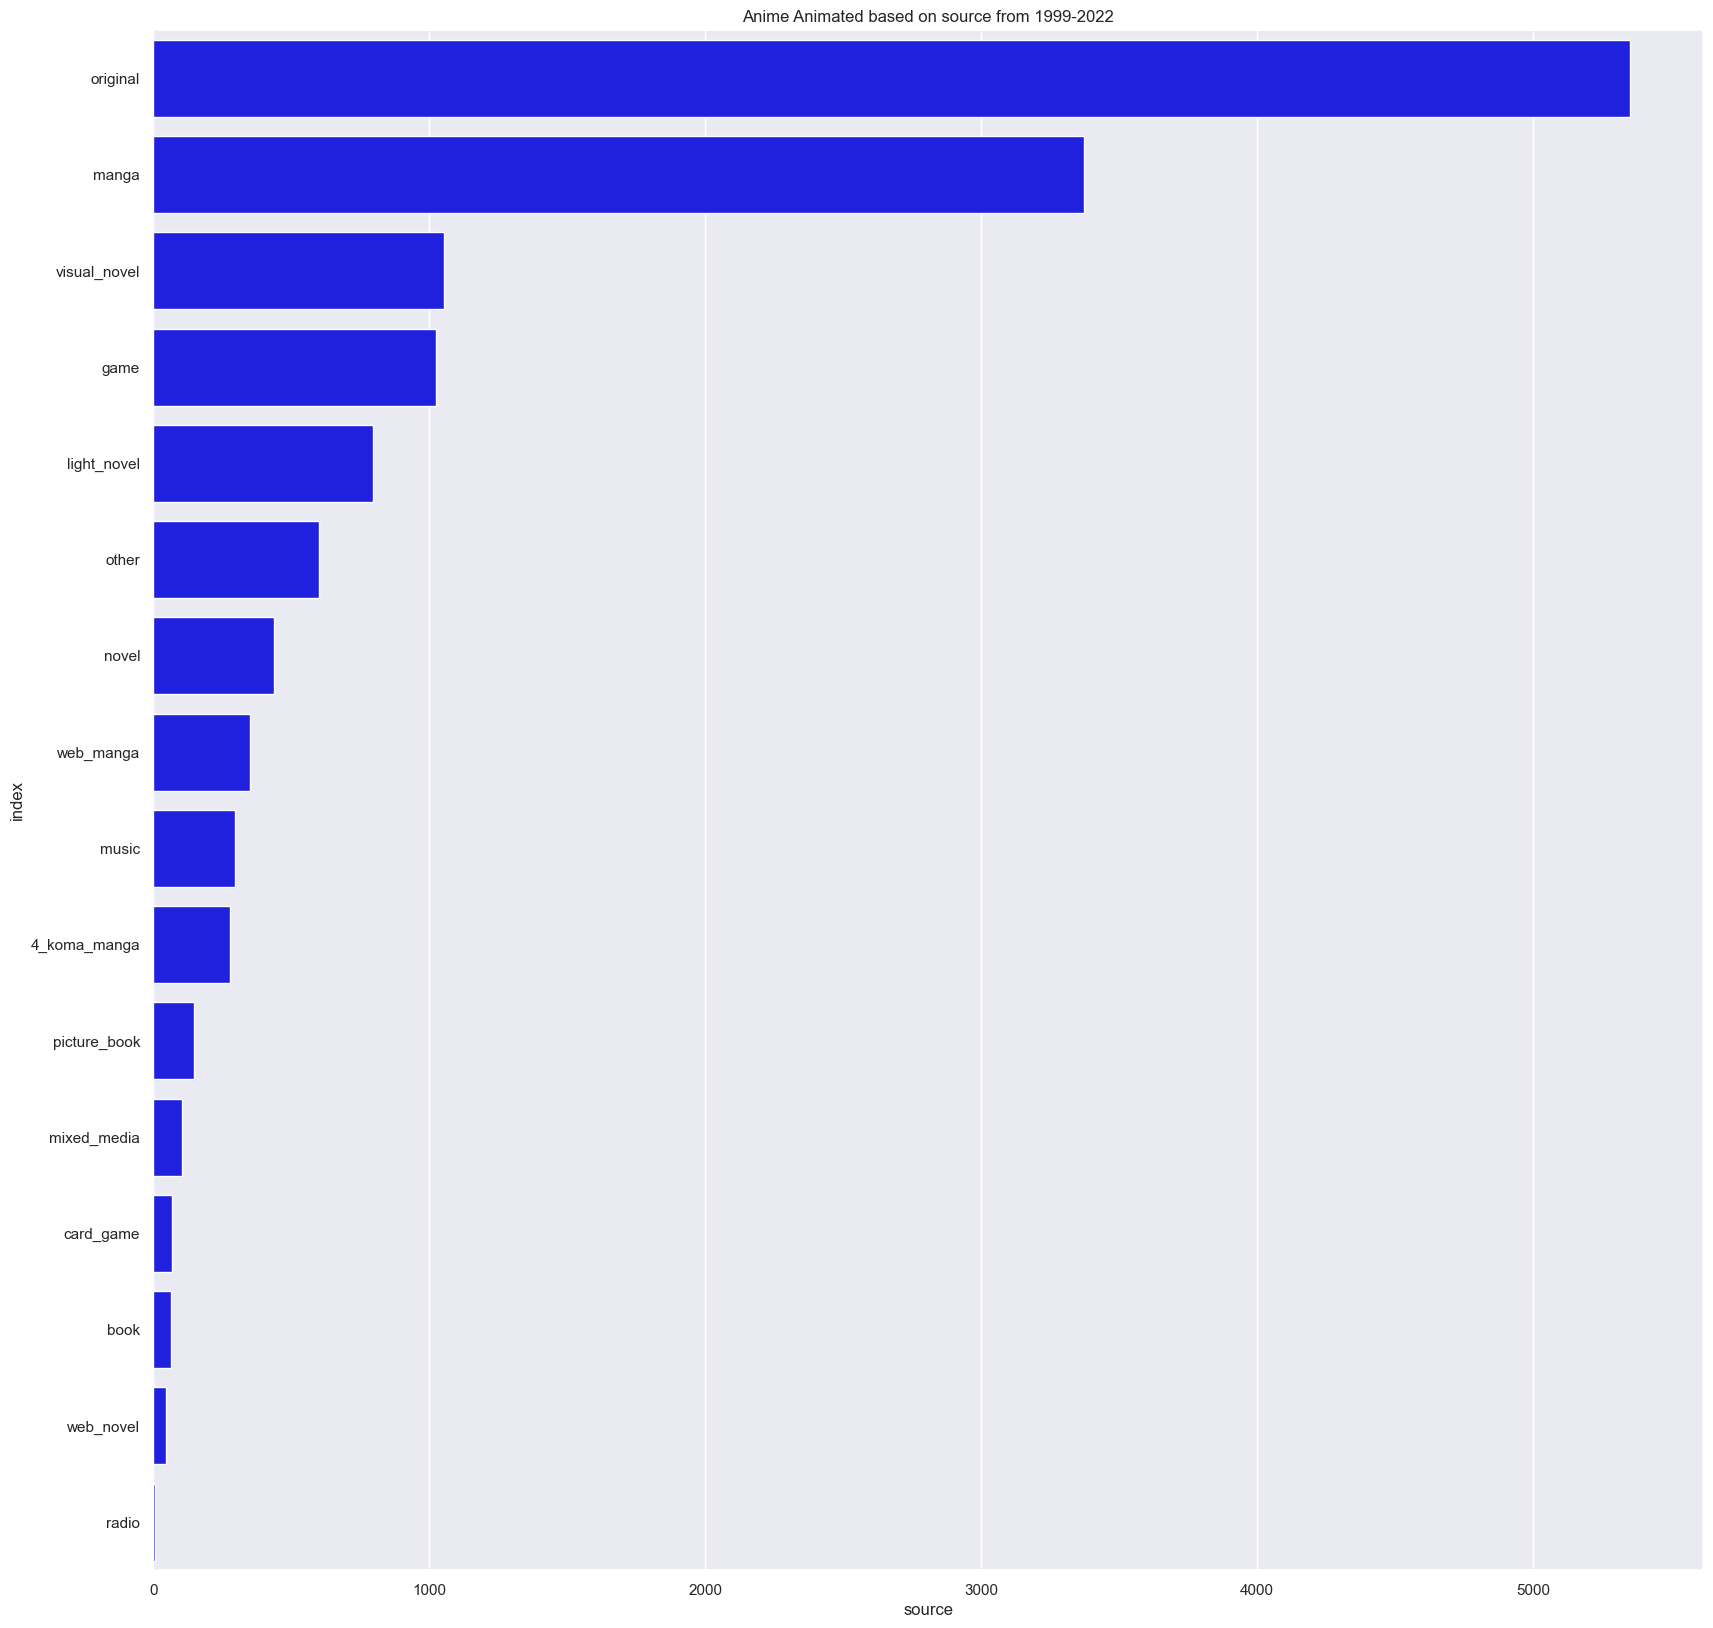

In [13]:
df_source = pd.read_csv('anime_details_cleaned.csv')
df_source=df_source[df_source['start_season.year'].isin(lst)]
df_source_count = df_source['source'].value_counts()
df_source_count = pd.DataFrame(data = df_source_count)
df_source_count = df_source_count.reset_index()

plt.figure(figsize=(20, 20))

# Make a barplot
sb.barplot(
    x='source', 
    y="index",
    data=df_source_count, 
    estimator=sum, 
    ci=None, 
    color='Blue'
).set(title="Anime Animated based on source from 1999-2022");

# Analysis for Source

* Based on this bar graph, from 1999 - 2022. Anime created from an original source has the highest number, followed by manga (Chainsaw man, etc).... and visual novel, game and light_novel

# Source type with mean

<AxesSubplot:xlabel='mean', ylabel='source'>

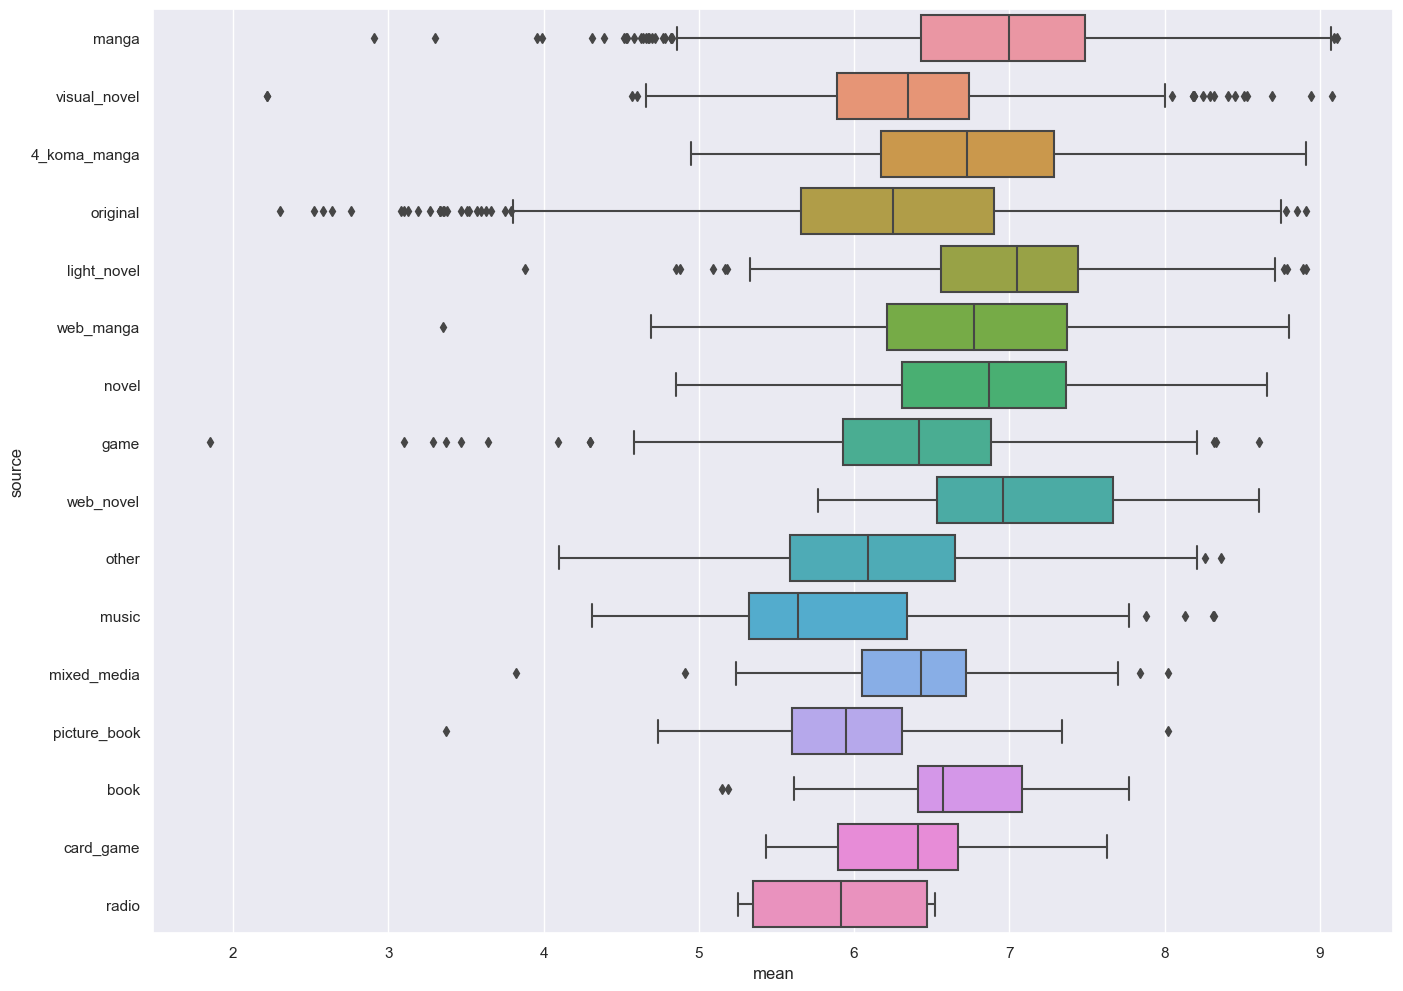

In [14]:
df_source_mean = pd.read_csv('anime_details_cleaned.csv')
df_source_mean=df_source_mean[df_source_mean['start_season.year'].isin(lst)]
df_source_mean = df_source_mean[['mean','source']]
df_source_mean = df_source_mean.dropna()
f = plt.figure(figsize=(16, 12 ))
sb.boxplot(x = 'mean', y = 'source',data = df_source_mean)

# Analysis

* Anime produced from source light novel produces the highest rated manga on average, folllowed by manga and web novel

# Ratings and mean

In [15]:
df_ratings = pd.read_csv('anime_details_cleaned.csv')
df_ratings=df_ratings[df_ratings['start_season.year'].isin(lst)]



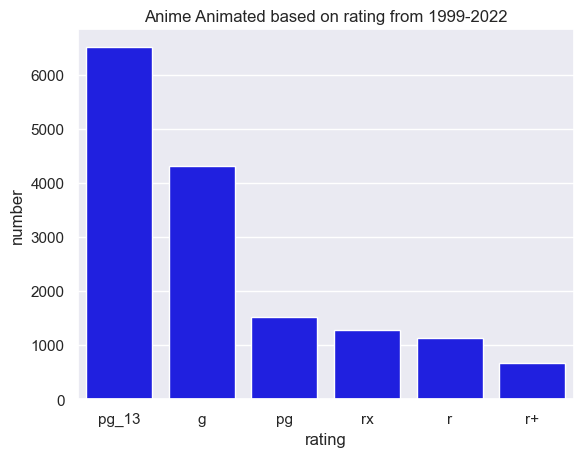

In [16]:
df_ratings_count = df_ratings[['rating']]
df_ratings_count=df_ratings_count['rating'].value_counts()
df_ratings_count = df_ratings_count.dropna()
df_ratings_count = pd.DataFrame(data = df_ratings_count)
df_ratings_count = df_ratings_count.reset_index()

df_ratings_count = df_ratings_count.rename(columns={"index": "rating", "rating": "number"})

sb.barplot(
    x='rating', 
    y="number",
    data=df_ratings_count, 
    estimator=sum, 
    ci=None, 
    color='Blue'
).set(title="Anime Animated based on rating from 1999-2022");

# Analysis

* Rating PG13 has the highest number of anime produeced, followed by G. 

<AxesSubplot:xlabel='mean', ylabel='rating'>

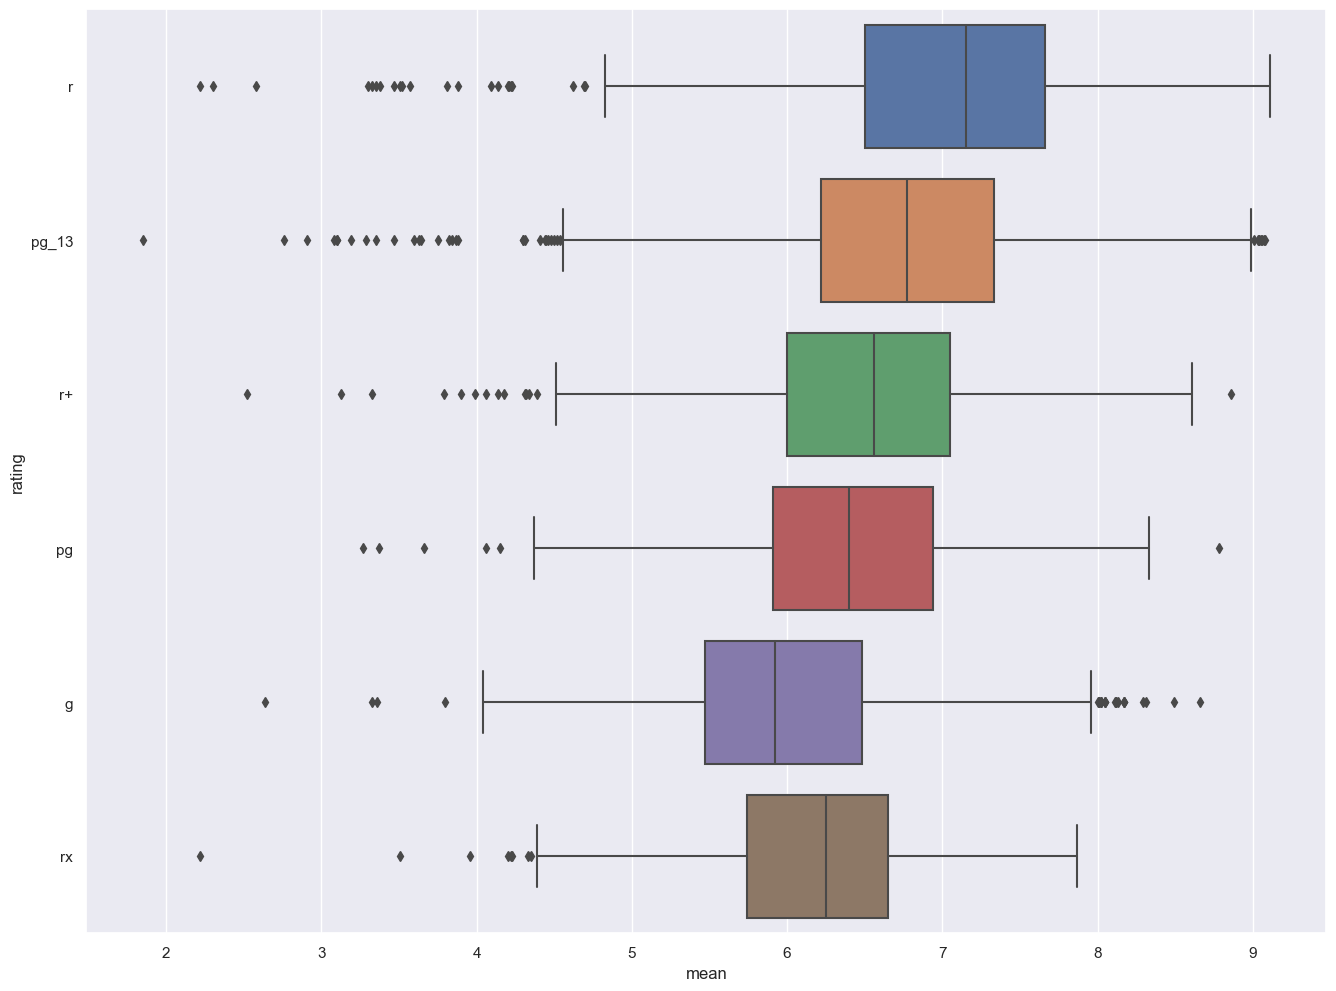

In [17]:
df_ratings_withmean = df_ratings[['mean','rating']]
df_ratings_withmean =df_ratings_withmean.dropna()
df_ratings_withmean = df_ratings_withmean.reset_index()
f = plt.figure(figsize=(16, 12 ))
sb.boxplot(x = 'mean', y = 'rating',data = df_ratings_withmean)

# Analysis on rating

* R rated animes have the highest average score followed by PG13